# Tasks Applied Statistics - Winter 2024

Lecturer: Ian McLoughlin  
Author: Lais Coletta Pereira  

---

In [66]:
# Core libraries used in this notebook
import math
import numpy as np
import pandas as pd

# Statistical functions and distributions
from scipy.special import comb 
from scipy.stats import shapiro, norm 
from scipy.stats import ttest_rel
from scipy.stats import f_oneway


# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Permutations and Combinations

_Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first_.

- _Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells._

### Steps:
1. Calculate the total number of ways to select 6 cups from 12.
2. Calculate the successful ways for different scenarios (6/5/4 correct attempts).
3. Sum up the successful ways.
4. Calculate the probability.

**Methodology**: To compute the required probabilities, we use the formula for combinations:  

$$
\binom{n}{k} = \frac{n!}{k! \cdot (n-k)!}
$$


**Calculations**:  

- **Probability of All Correct (6 correct):**  
$$
P(6 \, \text{correct}) = \frac{\binom{6}{6} \cdot \binom{6}{0}}{\binom{12}{6}}
$$

- **Probability of Exactly 5 Correct (1 error):**  
$$
P(5 \, \text{correct}) = \frac{\binom{6}{5} \cdot \binom{6}{1}}{\binom{12}{6}}
$$

- **Probability of Exactly 4 Correct (2 errors):**  
$$
P(4 \, \text{correct}) = \frac{\binom{6}{4} \cdot \binom{6}{2}}{\binom{12}{6}}
$$

**Combining Probabilities:**  

- **At most 1 error:**  
$$
P(\text{at most 1 error}) = P(6 \, \text{correct}) + P(5 \, \text{correct})
$$

- **At most 2 errors:**  
$$
P(\text{at most 2 errors}) = P(6 \, \text{correct}) + P(5 \, \text{correct}) + P(4 \, \text{correct})
$$


In [67]:
#We can easily do it using the math.comb method as per reference code: https://www.w3schools.com/python/ref_math_comb.asp
#Syntax: math.comb(n, k) - Note: The parameters passed in this method must be positive integers.

total_cups = 12  # Total number of cups
milk_cups = 6  # Number of cups with milk added first
tea_cups = 6  # Number of cups with tea added first
all_attempts = comb(total_cups, milk_cups)
probability = 1 / all_attempts

print(f"Probability of selecting all 6 milk-first cups correctly: {probability:.10f}")


Probability of selecting all 6 milk-first cups correctly: 0.0010822511


The probability of selecting all 6 milk-first cups correctly (0.0010822511) is determined by dividing the number of favorable outcomes ($\binom{6}{6} \times \binom{6}{0} = 1$) by the total possible outcomes ($\binom{12}{6} = 924$). This ratio reflects the likelihood of correctly identifying all 6 milk-first cups from 12 total cups (6 milk-first, 6 tea-first) by chance, assuming no special abilities. With a probability of approximately 0.1%, this result demonstrates the extremely low likelihood of success if the guesses are entirely random.


### - **_Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error._**

In [68]:
# Calculate the number of ways she has to select exactly 5 correct and 1 incorrect (combination)
five_correct_cups = comb(6, 5) * comb(6, 1) 

# Calculate the number of ways to select all 6 cups correctly
six_correct_cups = 1  # There is only one way to pick all 6 correctly as only 6 cups have milk in first

# Total successful ways 
successful_ways = five_correct_cups + six_correct_cups

# Probability of selecting at least 5 correct cups
probability_five_cups_correct= successful_ways / all_attempts

print(f"Probability of selecting at least 5 correct cups: {probability_five_cups_correct:.10f}")


Probability of selecting at least 5 correct cups: 0.0400432900


**Combination Formula**: In combinatorics, the combination formula (\(\binom{n}{k}\)) is used to calculate how many ways you can choose \(k\) elements from a set of \(n\) elements. The function `comb(n, k)` computes this for given \(n\) and \(k\).
  
**At Least 5 Correct**: The problem involves calculating the probability of selecting **at least 5 correct cups** out of 6 selections. The code accounts for two cases:
  1. 5 correct + 1 incorrect cup.
  2. 6 correct cups.
  
**Total Outcomes**: The total number of possible outcomes (`all_attempts`) is the total number of ways to choose 6 cups from the 12, represented by \(\binom{12}{6}\).

The calculated probability represents the likelihood of randomly selecting **at least 5 correct cups** out of the 12 cups, considering that there are 6 milk-first cups and 6 tea-first cups. Since this probability is relatively low, it demonstrates that success in this selection process is unlikely if the selection is random.

### - **_Would you accept two errors? Explain_.**

In [69]:
# Calculate the number of ways to select exactly 4 correct and 2 incorrect (combination)
four_correct_cups = comb(milk_cups, 4) * comb(tea_cups, 2) 
successful_ways = four_correct_cups + five_correct_cups + six_correct_cups
probability_four_cups_correct = successful_ways / all_attempts
print(f"Probability of selecting at least 4 correct cups: {probability_four_cups_correct:.10f}")

Probability of selecting at least 4 correct cups: 0.2835497835


The probability now is 0.28 (5 cups it was 0.04). Allowing two errors increases the probability of success because more scenarios (at least 4 correct cups) become possible. I would not accept two errors, because while this makes the guessing process slightly easier, it also **lowers the reliability of the test by making it easier for the lady to guess the tea cup that has tea first**. 

Therefore, allowing more errors improves the odds of success but reduces the robustness and reliability of the selection. 

### References:

1. "Permutations and Combinations." *GeeksforGeeks.* Retrieved from [https://www.geeksforgeeks.org/permutations-and-combinations/](https://www.geeksforgeeks.org/permutations-and-combinations/)

2. "Easy Permutations and Combinations." *BetterExplained.* Retrieved from [https://betterexplained.com/articles/easy-permutations-and-combinations/](https://betterexplained.com/articles/easy-permutations-and-combinations/)

3. "Fisher's Tea Problem." *Wild Pandas.* Retrieved from [https://lisds.github.io/textbook/wild-pandas/fishers_tea.html](https://lisds.github.io/textbook/wild-pandas/fishers_tea.html)

4. "math.comb() Function." *W3Schools.* Retrieved from [https://www.w3schools.com/python/ref_math_comb.asp](https://www.w3schools.com/python/ref_math_comb.asp)


---

## Task 2: Numpy's Normal Distribution

- **_In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0._**

Mean ($\mu$) = 10.0  
Standard Deviation ($\sigma$) = 3.0

In [70]:

#Generate a sample of 100.000 values
sample_size = 100_000

#Using the function with mean 10.0 and standard deviation 3.0.
mean = 10.0
std_dev = 3.0
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)


The `np.random.normal()`function from the **NumPy** library generates random numbers that follow a **normal (Gaussian) distribution**.

- `loc=mean`: This parameter sets the **mean** (\(\mu\)) of the distribution, which determines the center of the distribution. In this case, the mean is stored in the variable `mean`, which is **10.0**.

- `scale=std_dev`: This parameter sets the **standard deviation** (\(\sigma\)) of the distribution, which controls how spread out the values are. The standard deviation is stored in the variable `std_dev`, and it is **3.0**.

- `size=sample_size`: This parameter specifies how many random values to generate. The `sample_size` variable is set to **100,000**, meaning the function generates **100,000** random values.

The result is an array (`sample`) of **100,000** random values that follow a normal distribution with a **mean of 10.0** and a **standard deviation of 3.0**.


### - **_Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output._**

In [71]:
# Perform the Shapiro Wilk test.
shapiro(sample)

/Applications/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.999978286082786, pvalue=0.875007622861179)

`shapiro()`: This function is from the **SciPy** library, used to test whether a sample comes from a normal distribution.
  
The **Shapiro-Wilk test** computes a test statistic and a p-value. If the p-value is small (typically less than 0.05), it suggests that the sample does not follow a normal distribution. If the p-value is large, we fail to reject the hypothesis that the data follows a normal distribution.

### **_Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it._**

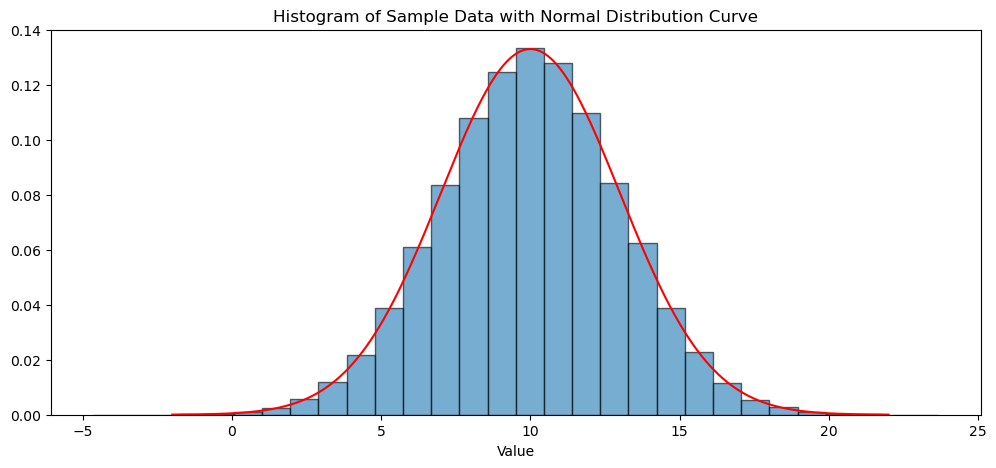

In [72]:
#Reference Code: https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python , https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the histogram of the data with density normalization
ax.hist(sample, edgecolor='black', density=True, bins=30, alpha=0.6)

# Create an x range.
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Get y values.
y = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
ax.plot(x, y, 'r-')

# Customize the plot
ax.set_title("Histogram of Sample Data with Normal Distribution Curve")
ax.set_xlabel("Value")
plt.show()

- **`ax.hist()`**: Plots the normalized histogram of the `sample`.
- **`x = np.linspace()`**: Generates x-values covering 4 standard deviations around the mean.
- **`y = norm.pdf()`**: Computes the probability density for the normal distribution.
- **`ax.plot()`**: Plots the normal distribution curve.
- **`plt.show()`**: Displays the plot with the histogram and curve.

### References

1. "Python Code Example." *OneCompiler.* Retrieved from [https://onecompiler.com/python/42azwxnth](https://onecompiler.com/python/42azwxnth)

2. "Shapiro-Wilk Test." *SciPy Documentation.* Retrieved from [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

3. "Shapiro-Wilk Test for Normality." *Wikipedia.* Retrieved from [https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)

4. "Matplotlib Documentation." *Matplotlib.* Retrieved from [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)

5. "Normal Distribution." *Wikipedia.* Retrieved from [https://en.wikipedia.org/wiki/Normal_distribution](https://en.wikipedia.org/wiki/Normal_distribution)

6. "GeeksforGeeks: How to Plot Normal Distribution Over Histogram in Python." Retrieved from [https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python](https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python)


---

# Task 3: t-Test Calculation
_Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program_.

| Patient ID | Before | After |
|------------|--------|-------|
| 0          | 63     | 64    |
| 1          | 68     | 64    |
| 2          | 70     | 68    |
| 3          | 64     | 64    |
| 4          | 74     | 73    |
| 5          | 67     | 70    |
| 6          | 70     | 72    |
| 7          | 57     | 54    |
| 8          | 66     | 61    |
| 9          | 65     | 63    |



### **_Part 1: Calculate the t-statistic based on this data set, using Python_.** 

Definition reminder:
- **t-statistic**: Measures the degree of difference between the two paired groups (before and after).
- **p-value**: Indicates the probability of observing this difference if the null hypothesis (no difference) were true. The lower the p-value, the greater the statistical significance of the observed difference. A p-value of 0.05 or lower is generally considered statistically significant. ([source](https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant.))

In [73]:

# Creat the dataset
data = {
    'Patient ID': range(10),
    'Before': [63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
    'After': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]
}
df = pd.DataFrame(data)
df.set_index('Patient ID', inplace=True)
df

,Before,After
Patient ID,,
0,63,64
1,68,64
2,70,68
3,64,64
4,74,73
5,67,70
6,70,72
7,57,54
8,66,61


**Compute the Differences** $D$ between the "Before" and "After" values.

In [74]:
df['Difference'] = df['Before'] - df['After']

**Calculate the Mean** $\bar{D}$ of these differences.

In [75]:
mean = df['Difference'].mean()

**Calculate the Standard Deviation** $s_D$ of these differences.

In [76]:
std = df['Difference'].std(ddof=1)  # Standard deviation with Bessel's correction
n = len(df)  # Sample size

mean , std

(1.1, 2.601281735350223)

**Compute the t-statistic** using the formula:

   $$
   t = \frac{\bar{D}}{s_D / \sqrt{n}}
   $$

   where $n$ is the number of paired samples.

In [77]:
# Calculate t-statistic
t_statistic = mean / (std / np.sqrt(n))
t_statistic

1.3372274824806278

### _Part 2: Compare it to the value given by scipy.stats. Explain your work and list any sources used_.

In [78]:
# Reference code: https://www.statology.org/paired-samples-t-test-python/
# Calculate t-statistic using scipy.stats
t_statistic_scipy, p_value = ttest_rel(df['Before'], df['After'])

print(f"Manual t-statistic: {t_statistic:.5f}")
print(f"SciPy t-statistic: {t_statistic_scipy:.5f}")
print(f"p-value: {p_value:.5f}")

Manual t-statistic: 1.33723
SciPy t-statistic: 1.33723
p-value: 0.21396


**Code Walkthrough:**
   - `ttest_rel(df['Before'], df['After'])`: This function calculates the t-statistic and p-value for paired samples, comparing the "Before" and "After" columns of the DataFrame `df`.
   - `t_statistic_scipy`: Stores the t-statistic value calculated by SciPy.
   - `p_value`: Stores the p-value which helps to determine the significance of the difference between the paired samples.

**Comparison**: When comparing the t-statistic calculated manually to the value generated by the scipy.ttest_rel() function, both values were the same. This confirms that both methods accurately performed the paired sample t-test.

**P-Value**: A p-value of 0.21 indicates that the difference between the "before" and "after" heart rates is not statistically significant. This suggests that any observed difference in heart rates could likely be due to random chance rather than a consistent effect of the exercise program.

### References

1. "P-Value Definition." *Investopedia.* Retrieved from [https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant](https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant)

2. "scipy.stats.ttest_rel." *SciPy Documentation.* Retrieved from [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel)

3. "Example Paired Sample t-Test." *Minitab Support.* Retrieved from [https://support.minitab.com/en-us/minitab/help-and-how-to/statistics/basic-statistics/how-to/paired-t/before-you-start/example/](https://support.minitab.com/en-us/minitab/help-and-how-to/statistics/basic-statistics/how-to/paired-t/before-you-start/example/)

4. "How to Calculate Paired t-Test by Hand." *Statology*. Retrieved from [https://www.statology.org/paired-t-test-by-hand/](https://www.statology.org/paired-t-test-by-hand/)


--- 

# Task 4: Anova
_In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0_:

In [79]:
type_ii = 0

### _Now use a loop to perform the following test 10,000 times_.
_Use numpy.random.normal to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1._

In [80]:
# Parameters
no_times = 10000 
sample_size = 100  
std_dev = 0.1 
means = [4.9, 5.0, 5.1]  

for _ in range(no_times):
    # Generate three samples using numpy's random.normal function
    # loc: mean of the distribution, scale: standard deviation, size: number of values in the sample
    sample1 = np.random.normal(loc=means[0], scale=std_dev, size=sample_size)
    sample2 = np.random.normal(loc=means[1], scale=std_dev, size=sample_size)
    sample3 = np.random.normal(loc=means[2], scale=std_dev, size=sample_size)

### _Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs._
_Summarize and explain your results._

In [81]:
# Perform one-way ANOVA test
f_stat, p_value = f_oneway(sample1, sample2, sample3)

# Increment counter if a Type II error occurs (fail to reject null hypothesis)
# Null hypothesis is rejected when p_value < 0.05
if p_value >= 0.05:
    type_ii += 1

# Calculate the proportion of Type II errors
type_ii_error_rate = type_ii / no_times

# Print the results
print(f"Number of Type II errors: {type_ii}")
print(f"Proportion of Type II errors: {type_ii_error_rate:.4f}")

Number of Type II errors: 0
Proportion of Type II errors: 0.0000


#### What is a Type II Error?
A **Type II error** occurs when the null hypothesis ($H_0$) is false, but the test fails to reject it.

In this simulation:
- The null hypothesis assumes that the means of the three groups are equal, i.e.,

$$
H_0: \mu_1 = \mu_2 = \mu_3
$$

- However, the null hypothesis is false because the actual means are:

$$
\mu_1 = 4.9, \quad \mu_2 = 5.0, \quad \mu_3 = 5.1
$$

#### Simulation Details
1. **Samples**: Three independent samples are generated using `numpy.random.normal`.
2. **Sample Size**: Each sample contains $n = 100$ values.
3. **Means and Standard Deviations**:
   - The means are different: 
     $$\mu_1 = 4.9, \quad \mu_2 = 5.0, \quad \mu_3 = 5.1$$
   - The standard deviation is constant and given by:
     $$\sigma = 0.1$$

#### ANOVA Test
- The **one-way ANOVA test** is performed using `scipy.stats.f_oneway` to determine whether there is a significant difference between the means of the three samples. The one-way ANOVA tests if the means of multiple groups are equal, based on the null hypothesis $H_0$.
  
The test computes the **F-statistic**, which is the ratio of the variance between the groups to the variance within the groups:

$$
F = \frac{\text{variance between groups}}{\text{variance within groups}}
$$

- If the **F-statistic** is large and the **p-value** is small (typically less than 0.05), we **reject** the null hypothesis, indicating that there is a statistically significant difference between the groups.
- If the **p-value** is greater than or equal to 0.05 ($p \geq 0.05$), we fail to reject the null hypothesis and might potentially commit a **Type II error**. This would mean that despite the means being different, we are unable to detect the difference due to the power of the test being low.

#### Results
1. The number of Type II errors (`type_ii`) is counted over 10,000 iterations.
2. The **proportion of Type II errors** is calculated as:

$$
\text{Proportion of Type II errors} = \frac{\text{Number of Type II errors}}{\text{Total number of iterations}}
$$

#### Results Explained
- The result "Number of Type II errors: 0" and "Proportion of Type II errors: 0.0000" means that, over the course of the 10,000 simulations, **no Type II errors occurred**.
- A **Type II error** occurs when we **fail to reject the null hypothesis** ($H_0$) even though it is false (i.e., when the group means are actually different).
- If the Type II error proportion is **high**, it suggests that the statistical test is not sensitive enough to detect **small but meaningful differences** between the means.
- A high proportion of Type II errors could result from conditions such as:
  - **Small sample size** ($n$)
  - **Low standard deviation** ($\sigma$)
  - **Small differences** between the means of the groups ($\mu_1, \mu_2, \mu_3$)


### References

1. "scipy.stats.f_oneway." *SciPy Documentation.* Retrieved from [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

2. "Types of Errors in Hypothesis Testing." *Statistics by Jim.* Retrieved from [https://statisticsbyjim.com/hypothesis-testing/types-errors-hypothesis-testing/](https://statisticsbyjim.com/hypothesis-testing/types-errors-hypothesis-testing/)

3. "One-Way ANOVA Using SPSS Statistics." *Laerd Statistics.* Retrieved from [https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php)

4. "One-Way ANOVA (Analysis of Variance) in Python." *Statology.* Retrieved from [https://www.statology.org/one-way-anova-python/](https://www.statology.org/one-way-anova-python/)

5. "Type II Error." *Wikipedia.* Retrieved from [https://en.wikipedia.org/wiki/Type_II_error](https://en.wikipedia.org/wiki/Type_II_error)

---
### Thank you!